In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans

In [2]:
raw_data_1 = pd.read_csv("./LPSE LKPP + pemenang.csv")

raw_data_1.head(10)

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,11,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6594119,Tenaga Ahli Transportasi (Sektor Jalan dan Dar...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],204 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6593119,Tenaga Ahli Muda Transportasi (Sektor Laut) Ke...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"129,9 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6592119,Tenaga Ahli Muda Transportasi Kegiatan Integra...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6591119,Tenaga Ahli Muda GIS Kegiatan Koordinasi Strat...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"129,9 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6590119,Tenaga Ahli Kelembagaan dan Kebijakan Publik K...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],264 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data_2 = pd.read_csv("./data sirup update.csv")

raw_data_2.head(10)

,Unnamed: 0,idBulan,metode,nama,instansi,lokasi,jenis,waktu,idMetode,id,pagu,idJenisPengadaan,satuanKerja
0,0,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...
1,1,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...
2,2,4,Pengadaan Langsung,Pengadaan Kursi Pejabat,Pemerintah Daerah Kabupaten Buton Tengah,-,Barang,2023-04-01,8,20854093,5000000,1,DINAS KOMUNIKASI INFORMATIKA STATISTIK DAN PER...
3,3,1,Pengadaan Langsung,Belanja Bahan Pakai Habis,Pemerintah Daerah Kota Depok,-,Barang,2021-01-01,8,20376353,10513000,1,DINAS KETAHANAN PANGAN PERTANIAN DAN PERIKANAN
4,4,12,Pengadaan Langsung,Pengadaan Frame Acrilik Poster,Kementerian Kesehatan,-,Barang,2020-12-01,8,22867952,120000000,1,SEKRETARIAT DIREKTORAT JENDERAL PELAYANAN KESE...
5,5,12,Tender Cepat,Pengadaan Malware Detonation,Kementerian Hukum Dan Hak Asasi Manusia RI,-,Barang,2020-12-01,14,22726379,2000000000,1,DIREKTORAT JENDERAL ADMINISTRASI HUKUM UMUM
6,6,12,Pengadaan Langsung,Belanja Smart Card PKB,Pemerintah Daerah Kabupaten Bantul,-,Barang,2020-12-01,8,22764274,250000000,1,Dinas Perhubungan
7,7,11,Tender,Pembangunan IPA Kapasitas 50 l/dt SPAM KSPN T...,Kementerian Pekerjaan Umum dan Perumahan Rakyat,"Banten-Pandeglang (Kab.),","Pekerjaan Konstruksi,",2020-11-01,13,22742317,47396910000,0,PELAKSANAAN PRASARANA PERMUKIMAN PROVINSI BANTEN
8,8,11,E-Purchasing,Belanja modal pengadaan alat kedokteran umum d...,Pemerintah Daerah Kabupaten Klungkung,-,Barang,2020-11-01,9,22962548,6545000,1,DINAS KESEHATAN
9,9,11,Pengadaan Langsung,Pengadaan Bahan Operasional Lapang,Kementerian Kelautan Dan Perikanan,-,Barang,2020-11-01,8,22576098,90000000,1,BALAI BUDIDAYA AIR PAYAU SITUBONDO


In [4]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [5]:
result_preprocessing_1 = []
result_preprocessing_2 = []
for column in raw_data_1['nama_tender']:
    sentence = column.lower()
    word = word_tokenize(text = sentence)
    result_remove_punctuation = [result for result in word if result not in list(string.punctuation)]
    result_remove_stopwords = [result for result in result_remove_punctuation if not result in stopwords]
    result_remove_stopwords = ' '.join(result_remove_stopwords)
    result_preprocessing_1.append(result_remove_stopwords)
for column in raw_data_2['nama']:
    sentence = column.lower()
    word = word_tokenize(text = sentence)
    result_remove_punctuation = [result for result in word if result not in list(string.punctuation)]
    result_remove_stopwords = [result for result in result_remove_punctuation if not result in stopwords]
    result_remove_stopwords = ' '.join(result_remove_stopwords)
    result_preprocessing_2.append(result_remove_stopwords)

In [6]:
raw_data_1['preprocessing'] = result_preprocessing_1
raw_data_2['preprocessing'] = result_preprocessing_2

In [7]:
raw_data_1

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,40119,Pengadaan Working Furniture <span class='label...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"281,8 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,Pengadaan Barang,"Rp 281.825.500,00","Rp 281.825.500,00",CV.PULAU CANDI UTAMA,"Jl. Kramat Raya No.23 E Lt 1 Senen, Jakarta Pu...",01.626.119.0-023.000,"Rp 226.369.000,00",pengadaan working furniture span class='label ...
3446,39119,Pengadaan Living Furniture <span class='label ...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"290,2 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,Pengadaan Barang,"Rp 290.237.200,00","Rp 290.237.200,00",PT. Desaku Abadi,"Jl. Kedoya Raya No.53, Kedoya Selatan, Kebon J...",01.724.673.7-039.000,"Rp 251.541.400,00",pengadaan living furniture span class='label l...
3447,36119,PENGADAAN PERALATAN GEROBAK HOME INDUSTRI,Pemerintah Provinsi Bengkulu,Tender Sudah Selesai,"208,3 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pengadaan peralatan gerobak home industri
3448,32119,Pengadaan Modul Aplikasi - SIB,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,600 Jt,Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,Pengadaan Barang,"Rp 600.000.000,00","Rp 600.000.000,00",PT JIREH DATA INTEGRA,KOMPLEK RUKO MEGA GROSIR CEMPAKA MAS BLOK M no...,31.177.558.9-027.000,"Rp 594.000.000,00",pengadaan modul aplikasi sib


In [8]:
raw_data_2

,Unnamed: 0,idBulan,metode,nama,instansi,lokasi,jenis,waktu,idMetode,id,pagu,idJenisPengadaan,satuanKerja,preprocessing
0,0,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...,pengadaan lemari besi fireproof
1,1,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...,pengadaan lemari besi fireproof
2,2,4,Pengadaan Langsung,Pengadaan Kursi Pejabat,Pemerintah Daerah Kabupaten Buton Tengah,-,Barang,2023-04-01,8,20854093,5000000,1,DINAS KOMUNIKASI INFORMATIKA STATISTIK DAN PER...,pengadaan kursi pejabat
3,3,1,Pengadaan Langsung,Belanja Bahan Pakai Habis,Pemerintah Daerah Kota Depok,-,Barang,2021-01-01,8,20376353,10513000,1,DINAS KETAHANAN PANGAN PERTANIAN DAN PERIKANAN,belanja bahan pakai habis
4,4,12,Pengadaan Langsung,Pengadaan Frame Acrilik Poster,Kementerian Kesehatan,-,Barang,2020-12-01,8,22867952,120000000,1,SEKRETARIAT DIREKTORAT JENDERAL PELAYANAN KESE...,pengadaan frame acrilik poster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,1,Dikecualikan,Belanja Jasa Akomodasi Pelatihan Imam Masjid A...,Pemerintah Daerah Provinsi Sumatera Barat,-,Jasa Lainnya,2020-01-01,16,22421624,56000000,4,BIRO BINA MENTAL DAN KESEJAHTERAAN RAKYAT SETD...,belanja jasa akomodasi pelatihan imam masjid a...
1431,1431,1,Tender,Belanja Modal Pengadaan Alat Pemadam Kebakaran,Pemerintah Daerah Provinsi Kalimantan Timur,"Kalimantan Timur-Paser (Kab.),","Barang,",2020-01-01,13,22139846,938000000,0,Dinas Kehutanan,belanja modal pengadaan alat pemadam kebakaran
1432,1432,1,Seleksi,Review pola PSDA Tahap 1,Kementerian Pekerjaan Umum dan Perumahan Rakyat,"Jawa Barat-Bandung (Kota),","Jasa Konsultansi,",2020-01-01,15,22744714,494680000,0,BALAI BESAR WILAYAH SUNGAI CITARUM,review pola psda tahap 1
1433,1433,1,Dikecualikan,Belanja Jasa Akomodasi Imam Masjid Angkatan V,Pemerintah Daerah Provinsi Sumatera Barat,-,Jasa Lainnya,2020-01-01,16,22424242,56000000,4,BIRO BINA MENTAL DAN KESEJAHTERAAN RAKYAT SETD...,belanja jasa akomodasi imam masjid angkatan v


# Raw Data 1 - LPSE LKPP

In [9]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_weights_matrix = tfidf_vectorizer.fit_transform(raw_data_1['preprocessing'])
lda = LDA(n_components=20,n_jobs=-1)
lda_output = lda.fit_transform(tfidf_weights_matrix)
scaler = StandardScaler()
vectorScaler = scaler.fit_transform(lda_output)
vectorNormalize = normalize(vectorScaler)

In [10]:
kmeans_obj = KMeans(n_clusters=25, random_state=50)
kmeans_obj.fit(vectorNormalize)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

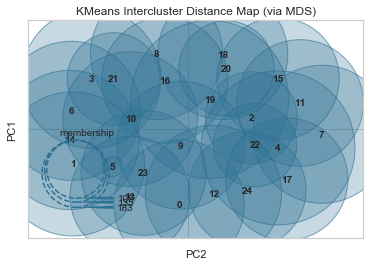

In [11]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

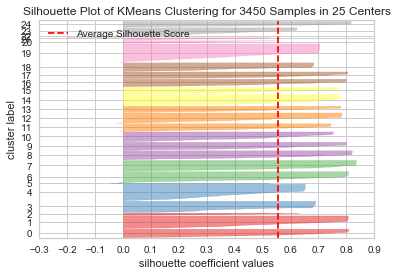

In [12]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [13]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5558507130307709

In [14]:
result_clustering = kmeans_obj.predict(vectorNormalize)

In [15]:
raw_data_1['kategori'] = result_clustering
raw_data_1

,kode,nama_tender,instansi,status_tender,hps,5,6,7,8,9,...,12,13,kategori,pagu,hps_detail,nama_pemenang,alamat_pemenang,npwp_pemenang,penawaran_pemenang,preprocessing
0,6599119,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],120 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,4,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli data driven kegiatan koordinasi se...
1,6598119,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"183,5 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli it analisa sistem kegiatan koordin...
2,6597119,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"228,4 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior monitoring evaluasi strateg...
3,6596119,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],"254,1 Jt",Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli senior perencanaan strategic natio...
4,6595119,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,Pengumuman Pascakualifikasi [...],132 Jt,Pascakualifikasi Dua File,Seleksi,Kualitas,Jasa Konsultansi Perorangan - TA 2020,3,...,NaN,0,4,NaN,NaN,NaN,NaN,NaN,NaN,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,40119,Pengadaan Working Furniture <span class='label...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"281,8 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,19,"Rp 281.825.500,00","Rp 281.825.500,00",CV.PULAU CANDI UTAMA,"Jl. Kramat Raya No.23 E Lt 1 Senen, Jakarta Pu...",01.626.119.0-023.000,"Rp 226.369.000,00",pengadaan working furniture span class='label ...
3446,39119,Pengadaan Living Furniture <span class='label ...,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,"290,2 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,10,"Rp 290.237.200,00","Rp 290.237.200,00",PT. Desaku Abadi,"Jl. Kedoya Raya No.53, Kedoya Selatan, Kebon J...",01.724.673.7-039.000,"Rp 251.541.400,00",pengadaan living furniture span class='label l...
3447,36119,PENGADAAN PERALATAN GEROBAK HOME INDUSTRI,Pemerintah Provinsi Bengkulu,Tender Sudah Selesai,"208,3 Jt",Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,pengadaan peralatan gerobak home industri
3448,32119,Pengadaan Modul Aplikasi - SIB,Lembaga Kebijakan Pengadaan Barang/Jasa Pemeri...,Tender Sudah Selesai,600 Jt,Pascakualifikasi Satu File,Lelang Umum,Harga Terendah Sistem Gugur,Pengadaan Barang - TA 2011,1,...,0.0,0,3,"Rp 600.000.000,00","Rp 600.000.000,00",PT JIREH DATA INTEGRA,KOMPLEK RUKO MEGA GROSIR CEMPAKA MAS BLOK M no...,31.177.558.9-027.000,"Rp 594.000.000,00",pengadaan modul aplikasi sib


In [17]:
raw_data_1.to_csv("LPSE LKPP + pemenang.csv",index=False)

# Raw Data 2 - SIRUP

In [18]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_weights_matrix = tfidf_vectorizer.fit_transform(raw_data_2['preprocessing'])
lda = LDA(n_components=20,n_jobs=-1)
lda_output = lda.fit_transform(tfidf_weights_matrix)
scaler = StandardScaler()
vectorScaler = scaler.fit_transform(lda_output)
vectorNormalize = normalize(vectorScaler)

In [19]:
kmeans_obj = KMeans(n_clusters=20, random_state=50)
kmeans_obj.fit(vectorNormalize)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


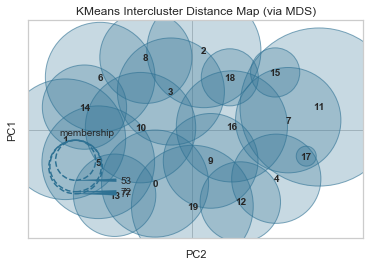

In [20]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

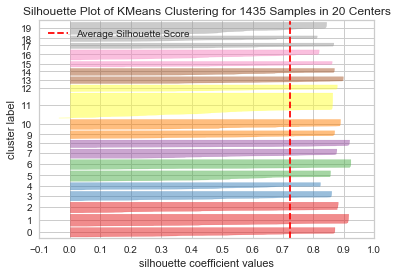

In [21]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [22]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.7231653465119717

In [23]:
result_clustering = kmeans_obj.predict(vectorNormalize)

In [24]:
raw_data_2['kategori_kmeans'] = result_clustering
raw_data_2

,Unnamed: 0,idBulan,metode,nama,instansi,lokasi,jenis,waktu,idMetode,id,pagu,idJenisPengadaan,satuanKerja,preprocessing,kategori_kmeans
0,0,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...,pengadaan lemari besi fireproof,0
1,1,10,E-Purchasing,Pengadaan Lemari Besi Fireproof,Kementerian Keuangan,-,Barang,2023-10-01,9,22319671,23000000,1,DIREKTORAT JENDERAL PENGELOLAAN PEMBIAYAAN DAN...,pengadaan lemari besi fireproof,0
2,2,4,Pengadaan Langsung,Pengadaan Kursi Pejabat,Pemerintah Daerah Kabupaten Buton Tengah,-,Barang,2023-04-01,8,20854093,5000000,1,DINAS KOMUNIKASI INFORMATIKA STATISTIK DAN PER...,pengadaan kursi pejabat,7
3,3,1,Pengadaan Langsung,Belanja Bahan Pakai Habis,Pemerintah Daerah Kota Depok,-,Barang,2021-01-01,8,20376353,10513000,1,DINAS KETAHANAN PANGAN PERTANIAN DAN PERIKANAN,belanja bahan pakai habis,15
4,4,12,Pengadaan Langsung,Pengadaan Frame Acrilik Poster,Kementerian Kesehatan,-,Barang,2020-12-01,8,22867952,120000000,1,SEKRETARIAT DIREKTORAT JENDERAL PELAYANAN KESE...,pengadaan frame acrilik poster,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,1,Dikecualikan,Belanja Jasa Akomodasi Pelatihan Imam Masjid A...,Pemerintah Daerah Provinsi Sumatera Barat,-,Jasa Lainnya,2020-01-01,16,22421624,56000000,4,BIRO BINA MENTAL DAN KESEJAHTERAAN RAKYAT SETD...,belanja jasa akomodasi pelatihan imam masjid a...,12
1431,1431,1,Tender,Belanja Modal Pengadaan Alat Pemadam Kebakaran,Pemerintah Daerah Provinsi Kalimantan Timur,"Kalimantan Timur-Paser (Kab.),","Barang,",2020-01-01,13,22139846,938000000,0,Dinas Kehutanan,belanja modal pengadaan alat pemadam kebakaran,16
1432,1432,1,Seleksi,Review pola PSDA Tahap 1,Kementerian Pekerjaan Umum dan Perumahan Rakyat,"Jawa Barat-Bandung (Kota),","Jasa Konsultansi,",2020-01-01,15,22744714,494680000,0,BALAI BESAR WILAYAH SUNGAI CITARUM,review pola psda tahap 1,17
1433,1433,1,Dikecualikan,Belanja Jasa Akomodasi Imam Masjid Angkatan V,Pemerintah Daerah Provinsi Sumatera Barat,-,Jasa Lainnya,2020-01-01,16,22424242,56000000,4,BIRO BINA MENTAL DAN KESEJAHTERAAN RAKYAT SETD...,belanja jasa akomodasi imam masjid angkatan v,12


In [25]:
raw_data_2.to_csv("data sirup update.csv",index=False)